In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
def ell(tau, ep):
    return (1 + ep * np.cos(2 * tau))
def Omega(tau, ep):
    return -1*(np.sin(tau))
def energy(tau, ep):
    return 0.5 * Omega(tau, ep) **2 - np.cos(theta(tau))
def theta(tau):
    return np.cos(tau)

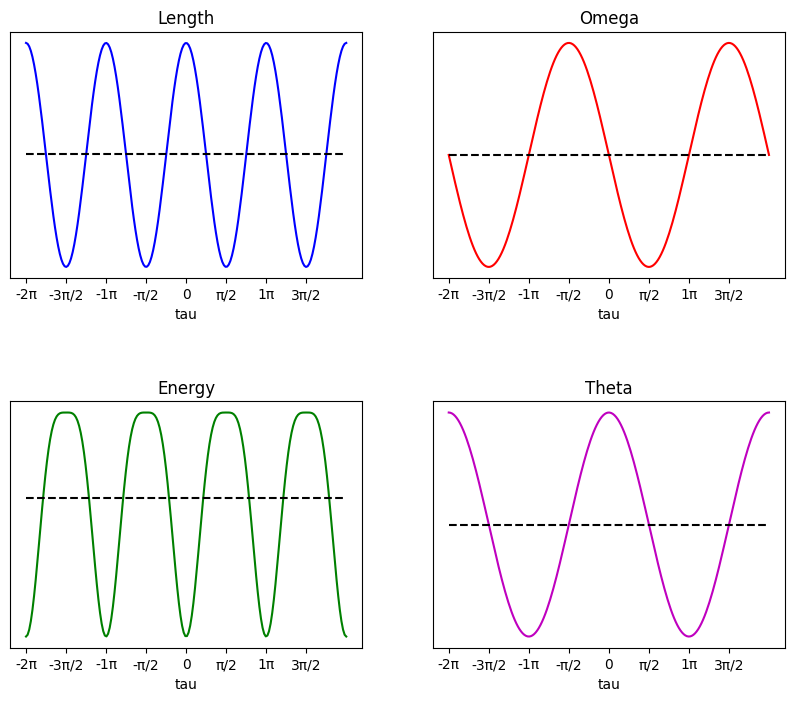

In [60]:
ep = 0.1
tau = np.linspace(-np.pi * 2, np.pi * 2, 200)
tau_ticks = np.arange(-np.pi * 2, np.pi * 2, np.pi/2)
tau_ticks_label = [f'0' if n == 0 else f'-π/2' if n == -1 else f'π/2' if n == 1 else f'{int(n/2)}π' if n%2 == 0 else f'{int(n)}π/2' for n in tau_ticks / (np.pi / 2)] 

plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 1)
plt.plot(tau, ell(tau, ep), 'b-', label = "Length")
plt.plot(tau, [np.mean(ell(tau, ep)) for _ in range(len(tau))], 'k--')
plt.xlabel("tau")
plt.title("Length")
plt.yticks([])  
plt.xticks(tau_ticks, tau_ticks_label)

plt.subplot(2, 2, 2)
plt.plot(tau, Omega(tau, ep), 'r-', label = "Omega")
plt.plot(tau, 0 * tau, 'k--')
plt.xlabel("tau")
plt.title("Omega")
plt.yticks([])  
plt.xticks(tau_ticks, tau_ticks_label)

plt.subplot(2, 2, 3)
plt.plot(tau, energy(tau, ep), 'g-', label = "Energy")
plt.plot(tau, [np.mean(energy(tau, ep)) for _ in range(len(tau))], 'k--')
plt.xlabel("tau")
plt.title("Energy")
plt.yticks([])  
plt.xticks(tau_ticks, tau_ticks_label)

plt.subplot(2, 2, 4)
plt.plot(tau, theta(tau),  'm-', label = "Theta")
plt.plot(tau, 0 * tau, 'k--')
plt.xlabel("tau")
plt.title("Theta")
plt.yticks([])  
plt.xticks(tau_ticks, tau_ticks_label)


plt.show()

In [3]:
# Obtaining eigenvectors and eigenvaules from our linear system
import sympy as sm
sm.init_printing(fontsize=200)
sm.var('alpha')
sm.var('beta')
sm.var('tau')
arr = sm.Matrix( [[0                           , 1],
                  [-(alpha+ beta * sm.cos(tau)), 0]] )

eigenvals = []
eigenvects = []
for tup in arr.eigenvects():
    eigenvals.append(tup[0])
    eigenvects.append(tup[2][0])

fun_matrix = sm.Matrix([eigenvects])

In [15]:
#period
T = 2*np.pi
#Monodromy matrix is the fundamental matrix evaluated at tau = period
mono_matrix = fun_matrix.subs(tau, T)

sm.simplify(mono_matrix)


⎡   -1           1     ⎤
⎢──────────  ──────────⎥
⎢  ________    ________⎥
⎢╲╱ -α - β   ╲╱ -α - β ⎥
⎢                      ⎥
⎣    1           1     ⎦

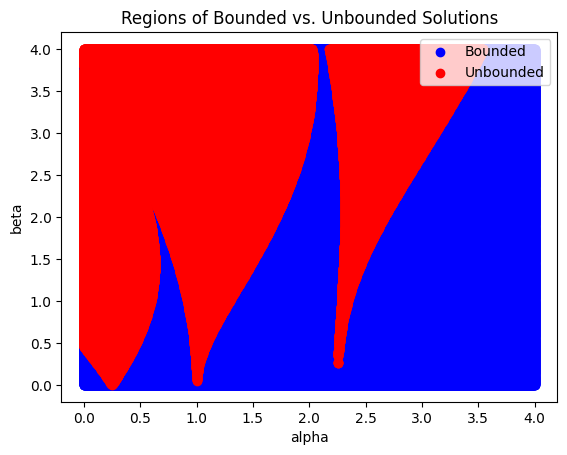

In [64]:
#Function to model the system
def system(Y, t, a, b):
    x, y, phi11, phi12, phi21, phi22 = Y

    dxdt = y
    dydt = -(a + b * np.cos(t)) * x
    dphi11dt = phi12
    dphi12dt = -(a + b * np.cos(t)) * phi11
    dphi21dt = phi22
    dphi22dt = -(a + b * np.cos(t)) * phi21

    return [dxdt, dydt, dphi11dt, dphi12dt, dphi21dt, dphi22dt]
    

#Calculates the monodromy matrix from given alpha and beta
def calcualte_monodromy_matrix(alpha, beta):
    #Setting the period
    T = 2 * np.pi
    time = np.linspace(0, T, 1000)
    Y0 = [0, 1, 1, 0, 0, 1]  # initial conditions: [x0, y0, phi11, phi12, phi21, phi22]

    sol = odeint(system, Y0, time, args=(alpha, beta))

    M = np.array([[sol[-1, 2], sol[-1, 3]],
                  [sol[-1, 4], sol[-1, 5]]])
    return M


#Set up the values for alpha
alpha_span = np.linspace(0, 4, 1000)
beta_span = np.linspace(0, 4, 1000)

#Arrays to categorize solutions by choice of beta, alpha
bounded_solns = []
unbounded_solns = []
unbounded_eigenvals = []
bounded_eigenvals = []

for alpha in alpha_span:
    for beta in beta_span:
        # Calculate mono matrix
        monodromy = calcualte_monodromy_matrix(alpha, beta)
        
        #Extracting eigenvalues
        eigenvalues = np.linalg.eigvals(monodromy)
        
        #saving off eigenvalues
        eigenvals.append(eigenvalues)
        
        #Checking magnitudes to see distance from 1.0
        magnitudes = np.abs(eigenvalues)
        
        if all(np.isclose(magnitudes, 1.0, atol=1e-3)):
            bounded_solns.append((alpha, beta))
            bounded_eigenvals.append(magnitudes)
        else:
            unbounded_solns.append((alpha, beta))
            unbounded_eigenvals.append(magnitudes)
            
bounded_solns = np.array(bounded_solns)
unbounded_solns = np.array(unbounded_solns)

plt.scatter(bounded_solns[:, 0], bounded_solns[:, 1], color='blue', label='Bounded')
plt.scatter(unbounded_solns[:, 0], unbounded_solns[:, 1], color='red', label='Unbounded')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.legend()
plt.title('Regions of Bounded vs. Unbounded Solutions')
plt.show()

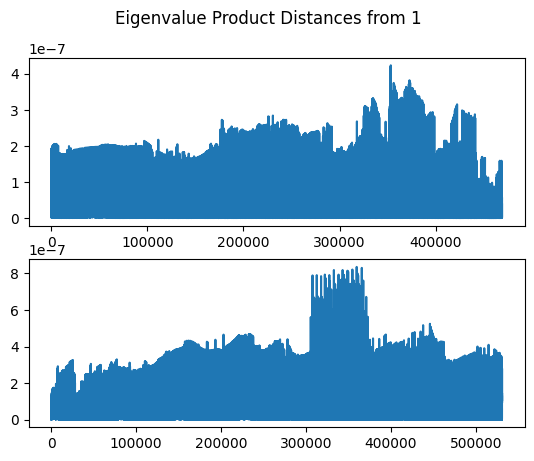

In [93]:
unbounded_mag = [e1*e2 - 1 for e1, e2 in unbounded_eigenvals]
bounded_mag = [e1*e2 - 1 for e1, e2 in bounded_eigenvals]
fig, axs = plt.subplots(2)
fig.suptitle('Eigenvalue Product Distances from 1')
axs[0].plot(np.abs(unbounded_mag), label = "unbounded")
axs[1].plot(np.abs(bounded_mag), label = "bounded")

Text(0, 0.5, 'Imaginary')

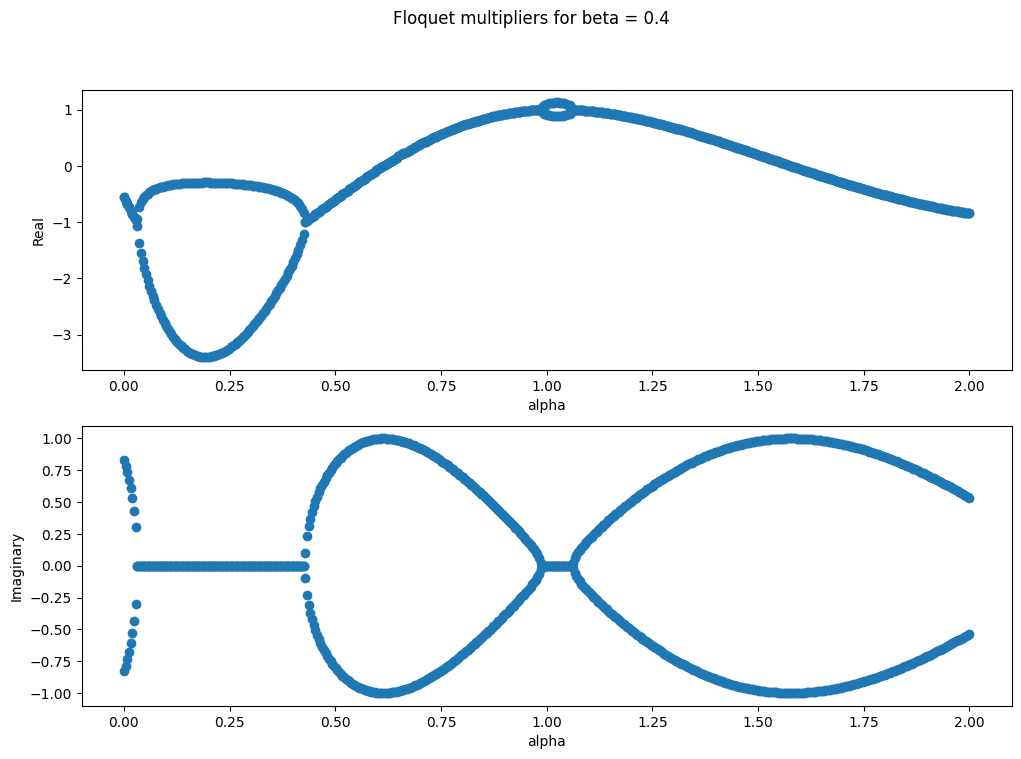

In [201]:
#Function to model the system
def system(Y, t, a, b):
    x, y, phi11, phi12, phi21, phi22 = Y

    dxdt = y
    dydt = -(a + b * np.cos(t)) * x
    dphi11dt = phi12
    dphi12dt = -(a + b * np.cos(t)) * phi11
    dphi21dt = phi22
    dphi22dt = -(a + b * np.cos(t)) * phi21

    return [dxdt, dydt, dphi11dt, dphi12dt, dphi21dt, dphi22dt]


#Calculates the monodromy matrix from given alpha and beta
def calcualte_monodromy_matrix(alpha, beta):
    #Setting the period
    T = 2 * np.pi
    time = np.linspace(0, T, 100)
    Y0 = [0, 1, 1, 0, 0, 1]  # initial conditions: [x0, y0, phi11, phi12, phi21, phi22]

    sol = odeint(system, Y0, time, args=(alpha, beta))

    M = np.array([[sol[-1, 2], sol[-1, 3]],
                  [sol[-1, 4], sol[-1, 5]]])
    return M


#Set up the values for alpha
alpha_span = np.linspace(0, 2, 500)
beta = 0.4
real_eigenvals = []
imag_eigenvals = []

for alpha in alpha_span:
    # Calculate mono matrix
    monodromy = calcualte_monodromy_matrix(alpha, beta)

    #Extracting eigenvalues

    eigenvalues = np.linalg.eigvals(monodromy)

    #saving off eigenvalues
    for val in eigenvalues: 
        real_eigenvals.append(tuple([alpha, val.real]))
        imag_eigenvals.append(tuple([alpha, val.imag]))
        
fig, axs = plt.subplots(2, figsize=(12,8))
fig.suptitle('Floquet multipliers for beta = {}'.format(beta))
axs[0].scatter(*zip(*real_eigenvals))
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Real")

axs[1].scatter(*zip(*imag_eigenvals))
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Imaginary")
